In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error
from sklearn import datasets

In [2]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)

<AxesSubplot:xlabel='x', ylabel='y'>

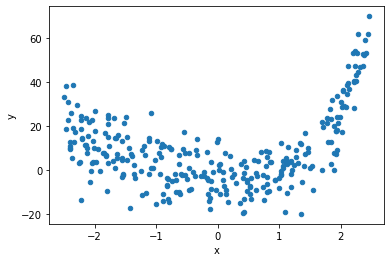

In [3]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [4]:
# Breast cancer data

In [5]:
X_b = data_breast_cancer.data
y_b = data_breast_cancer.target

In [6]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b,y_b,test_size=0.2,random_state=42)

In [7]:
f1_train = [0 for i in range(10)]
f1_test = [0 for i in range(10)]
x_plot = np.linspace(1,11,10)
for i in range(1,11):
    tree_clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    tree_clf.fit(X_train_b,y_train_b)
    f1_train[i-1] = f1_score(y_train_b,tree_clf.predict(X_train_b))
    f1_test[i-1] = f1_score(y_test_b,tree_clf.predict(X_test_b))

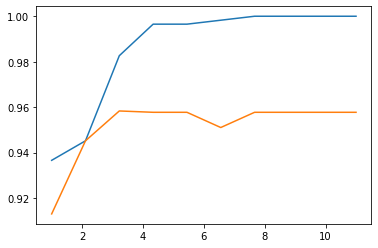

In [8]:
fig = plt.figure()
plt.plot(x_plot,f1_train)
plt.plot(x_plot,f1_test)

In [9]:
tree_depth = 3
tree_clf = DecisionTreeClassifier(max_depth=tree_depth, random_state=42)
tree_clf.fit(X_train_b,y_train_b)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [10]:
# TODO--------------------------------------------------------------------RYSOWANIE DRZEWA

In [11]:
f1tr = f1_score(y_train_b,tree_clf.predict(X_train_b))
f1te = f1_score(y_test_b,tree_clf.predict(X_test_b))
acctr = accuracy_score(y_train_b,tree_clf.predict(X_train_b))
accte = accuracy_score(y_test_b,tree_clf.predict(X_test_b))

In [12]:
f1acc_tree = [tree_depth, f1tr, f1te, acctr, accte]
f1acc_tree

[3,
 0.9826388888888888,
 0.9583333333333334,
 0.978021978021978,
 0.9473684210526315]

In [13]:
with open('f1acc_tree.pkl','wb') as f:
    pickle.dump(f1acc_tree,f)

In [14]:
# Regression data

In [15]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X.reshape(-1, 1),y.reshape(-1, 1),test_size=0.2,random_state=42)

In [16]:
mse_train = [0 for i in range(10)]
mse_test = [0 for i in range(10)]
x_plot = np.linspace(1,11,10)
for i in range(1,11):
    tree_reg = DecisionTreeRegressor(max_depth=i, random_state=42)
    
    tree_reg.fit(X_train_r,y_train_r)
    mse_train[i-1] = mean_squared_error(y_train_r,tree_reg.predict(X_train_r))
    mse_test[i-1] = mean_squared_error(y_test_r,tree_reg.predict(X_test_r))

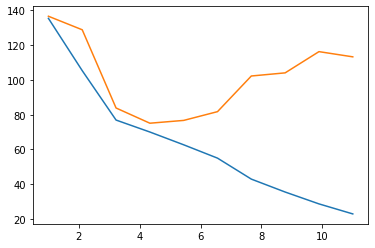

In [17]:
fig = plt.figure()
plt.plot(x_plot,mse_train)
plt.plot(x_plot,mse_test)

In [18]:
tree_depth = 3
tree_reg = DecisionTreeRegressor(max_depth=tree_depth, random_state=42)
tree_reg.fit(X_train_r,y_train_r)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [19]:
# TODO--------------------------------------------------------------------RYSOWANIE DRZEWA

In [20]:
msetr = mean_squared_error(y_train_r,tree_reg.predict(X_train_r))
msete = mean_squared_error(y_test_r,tree_reg.predict(X_test_r))

In [21]:
mse_tree = [tree_depth, msetr, msete]
mse_tree

[3, 76.84329837880804, 83.77711139631278]

In [22]:
with open('mse_tree.pkl','wb') as f:
    pickle.dump(mse_tree,f)